# Instacart Recommendation System: Data Wrangling and Exploratory Data Analysis

## Notebook by Lauren Dellon

Note: The data used in this notebook and subsequent notebooks is taken from a Kaggle competition called 'Instacart Market Basket Analysis'. The overview and data can be found here: https://www.kaggle.com/c/instacart-market-basket-analysis/overview

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file

## Read files

In [2]:
aisles = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
aisles.shape

(134, 2)

There are a total of 134 aisles.

In [4]:
departments = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
departments.shape

(21, 2)

There are a total of 21 departments.

In [6]:
products = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
products.shape

(49688, 4)

There are a total of 49,688 products.

In [8]:
orders = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
orders.shape

(3421083, 7)

There are a total of 3,421,083 orders.

In [10]:
order_products_prior = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/order_products__prior.csv')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
order_products_train = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/order_products__train.csv')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## Merge products with aisles and departments

In [12]:
products_merged = pd.merge(products, aisles, on='aisle_id', how='left')
products_merged = pd.merge(products_merged, departments, on='department_id', how='left')
products_merged.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


## Any missing values?

In [13]:
missing = pd.concat([products_merged.isnull().sum(), 100 * products_merged.isnull().mean()], axis=1)
missing.columns = ['count','%']
missing.sort_values(by='count')

,count,%
product_id,0,0.0
product_name,0,0.0
aisle_id,0,0.0
department_id,0,0.0
aisle,0,0.0
department,0,0.0


No missing values in the merged dataframe.

# ORDER ANALYSIS

## Order by day of week: which days of the week were most orders made?

Text(0.5, 1.0, 'Most Popular Days')

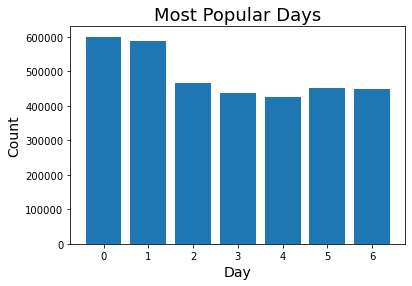

In [14]:
dow_df = pd.DataFrame(orders['order_dow'].value_counts())
dow_df['day'] = dow_df.index
dow_df = dow_df.sort_values('day')
dow_df = dow_df.rename({'order_dow':'count'},axis=1)
plt.bar(dow_df['day'],dow_df['count'])
plt.xlabel('Day',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Most Popular Days',fontsize=18)

## Order by hour of day: which hours of the day were most orders made?

Text(0.5, 1.0, 'Most Popular Hours')

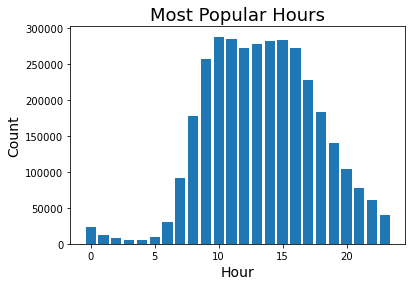

In [15]:
hour_df = pd.DataFrame(orders['order_hour_of_day'].value_counts())
hour_df['hour'] = hour_df.index
hour_df = hour_df.sort_values('hour')
hour_df = hour_df.rename({'order_hour_of_day':'count'},axis=1)
plt.bar(hour_df['hour'],hour_df['count'])
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Most Popular Hours',fontsize=18)

## Order day of week vs. Order hour of day

Text(0.5, 1.0, 'Number of Orders per Day per Hour')

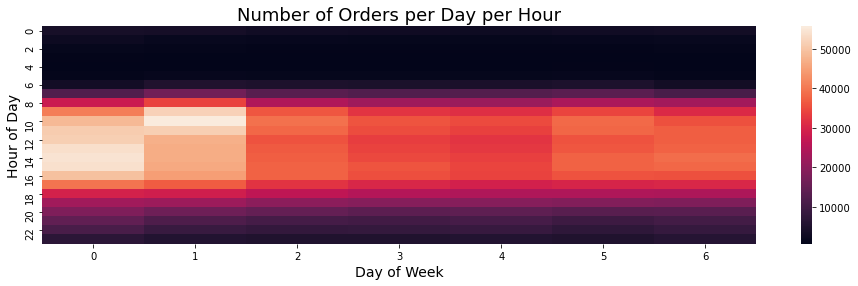

In [16]:
dow_hour_df = pd.DataFrame(orders.groupby(['order_dow','order_hour_of_day'])['order_hour_of_day'].agg('count'))
dow_hour_df = dow_hour_df.rename({'order_hour_of_day':'count'},axis=1)
dow_hour_df = dow_hour_df.unstack(level=0)
plt.figure(figsize=(16,4))
sns.heatmap(dow_hour_df,xticklabels=['0','1','2','3','4','5','6'])
plt.xlabel('Day of Week',fontsize=14)
plt.ylabel('Hour of Day',fontsize=14)
plt.title('Number of Orders per Day per Hour',fontsize=18)

We can see that there are very little orders at the beginning of the day, which is most likely 12am-6am. Then, orders pick up until the end of the night.

## Days since prior order

Text(0.5, 1.0, 'Days Since Prior Order')

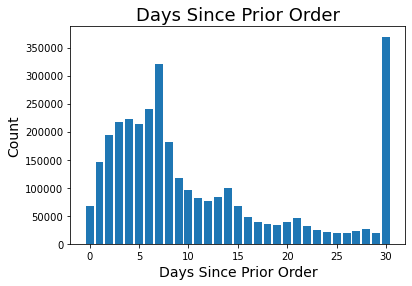

In [17]:
days_since_prior_order_df = pd.DataFrame(orders['days_since_prior_order'].value_counts())
days_since_prior_order_df = days_since_prior_order_df.rename({'days_since_prior_order':'count'},axis=1)
days_since_prior_order_df['days since prior order'] = days_since_prior_order_df.index
days_since_prior_order_df = days_since_prior_order_df.sort_values('days since prior order')
plt.bar(days_since_prior_order_df['days since prior order'],days_since_prior_order_df['count'])
plt.xlabel('Days Since Prior Order',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Days Since Prior Order',fontsize=18)

The majority of days since prior order is 30. This is most likely due to any number of days over 30 being assigned to the 30 category. It also looks like there may be many customers who order weekly, as the bars for 7, 14, and 21 days are local maxima. 

# PRODUCT + ORDER ANALYSIS

## Which aisles have the most products?

Text(0.5, 1.0, 'Aisles with Most Products')

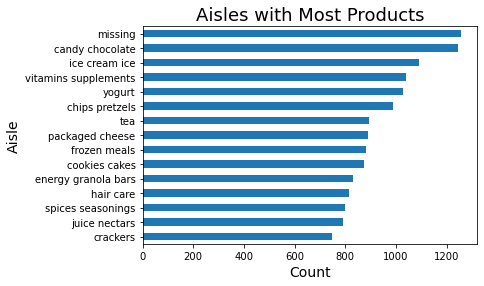

In [18]:
top_aisles = pd.DataFrame(products_merged['aisle'].value_counts().nlargest(15))
top_aisles = top_aisles.rename(columns={'aisle':'count'})
top_aisles['aisle'] = top_aisles.index
top_aisles = top_aisles.reset_index(drop=True)
top_aisles = top_aisles.sort_values(by=['count'])
ax = top_aisles.plot.barh(x='aisle',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Aisle',fontsize=14)
ax.set_title('Aisles with Most Products',fontsize=18)

## Which departments have the most products?

Text(0.5, 1.0, 'Departments with Most Products')

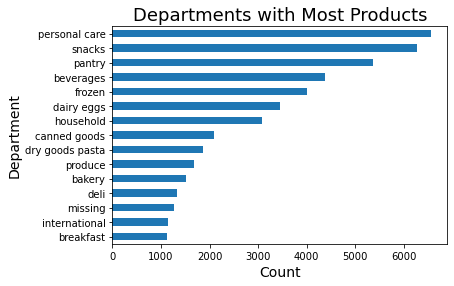

In [19]:
top_departments = pd.DataFrame(products_merged['department'].value_counts().nlargest(15))
top_departments = top_departments.rename(columns={'department':'count'})
top_departments['department'] = top_departments.index
top_departments = top_departments.reset_index(drop=True)
top_departments = top_departments.sort_values(by=['count'])
ax = top_departments.plot.barh(x='department',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Department',fontsize=14)
ax.set_title('Departments with Most Products',fontsize=18)

## Merge order_products_prior with products_merged

In [20]:
order_products_merged = pd.merge(order_products_prior, products_merged, on='product_id')
order_products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


## Top products ordered: What are the most popular products?

Text(0.5, 1.0, 'Most Popular Products')

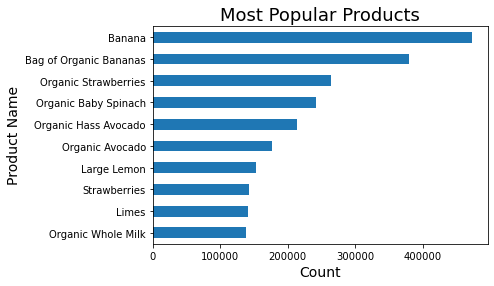

In [21]:
pop_products = pd.DataFrame(order_products_merged['product_name'].value_counts().nlargest(10))
pop_products = pop_products.rename(columns={'product_name':'count'})
pop_products['product_name'] = pop_products.index
pop_products = pop_products.reset_index(drop=True)
pop_products = pop_products.sort_values(by=['count'])
ax = pop_products.plot.barh(x='product_name',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Product Name',fontsize=14)
ax.set_title('Most Popular Products',fontsize=18)

Interestingly, the most popular products are fruits and vegetables, mostly organic. 

## Top aisles ordered from: What are the most popular aisles?

Text(0.5, 1.0, 'Most Popular Aisles')

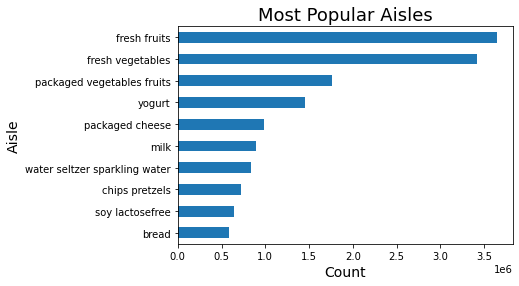

In [22]:
pop_aisles = pd.DataFrame(order_products_merged['aisle'].value_counts().nlargest(10))
pop_aisles = pop_aisles.rename(columns={'aisle':'count'})
pop_aisles['aisle'] = pop_aisles.index
pop_aisles = pop_aisles.reset_index(drop=True)
pop_aisles = pop_aisles.sort_values(by=['count'])
ax = pop_aisles.plot.barh(x='aisle',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Aisle',fontsize=14)
ax.set_title('Most Popular Aisles',fontsize=18)

## Top departments ordered from: What are the most popular departments?

Text(0.5, 1.0, 'Most Popular Departments')

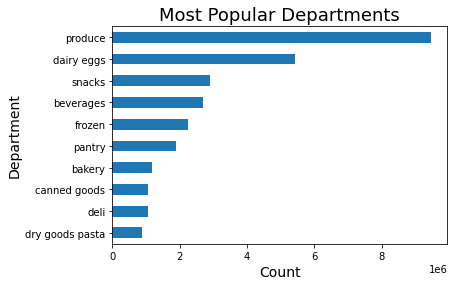

In [23]:
pop_departments = pd.DataFrame(order_products_merged['department'].value_counts().nlargest(10))
pop_departments = pop_departments.rename(columns={'department':'count'})
pop_departments['department'] = pop_departments.index
pop_departments = pop_departments.reset_index(drop=True)
pop_departments = pop_departments.sort_values(by=['count'])
ax = pop_departments.plot.barh(x='department',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Department',fontsize=14)
ax.set_title('Most Popular Departments',fontsize=18)

## Total reorders of a product

In [24]:
reorders = pd.DataFrame(order_products_merged.groupby('product_name')['reordered'].agg('sum'))
reorders = reorders.rename(columns={'reordered':'reordered_count'})
reorders['Product Name'] = reorders.index
reorders = reorders.reset_index(drop=True)
reorders.head()

,reordered_count,Product Name
0,257,#2 Coffee Filters
1,3,#2 Cone White Coffee Filters
2,0,#2 Mechanical Pencils
3,89,#4 Natural Brown Coffee Filters
4,87,& Go! Hazelnut Spread + Pretzel Sticks


Text(0.5, 1.0, 'Most Popular Reordered Products')

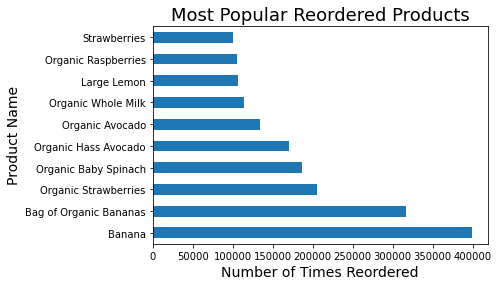

In [25]:
reorders = reorders.sort_values(by=['reordered_count'],ascending=False)
ax = reorders[:10].plot.barh(x='Product Name',y='reordered_count',legend=False)
ax.set_xlabel('Number of Times Reordered',fontsize=14)
ax.set_ylabel('Product Name',fontsize=14)
ax.set_title('Most Popular Reordered Products',fontsize=18)

## Merge order_products_prior with orders

In [26]:
order_products_complete = pd.merge(order_products_prior, orders, on='order_id')
order_products_complete = order_products_complete.sort_values(by=['user_id','order_number','add_to_cart_order'])
order_products_complete.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
24076664,2539329,196,1,0,1,prior,1,2,8,NaN
24076665,2539329,14084,2,0,1,prior,1,2,8,NaN
24076666,2539329,12427,3,0,1,prior,1,2,8,NaN
24076667,2539329,26088,4,0,1,prior,1,2,8,NaN
24076668,2539329,26405,5,0,1,prior,1,2,8,NaN
22742744,2398795,196,1,1,1,prior,2,3,7,15.0
22742745,2398795,10258,2,0,1,prior,2,3,7,15.0
22742746,2398795,12427,3,1,1,prior,2,3,7,15.0
22742747,2398795,13176,4,0,1,prior,2,3,7,15.0
22742748,2398795,26088,5,1,1,prior,2,3,7,15.0


We can see that for the first order of a user, the days_since_prior_order is null. This makes sense because the first order has no previous order.

## How often do people reorder?

In [27]:
order_products_complete.reordered.sum() / len(order_products_complete)

0.5896974667922161

About 59% of the products in an order are reordered products.

## How often are none of the products in an order reordered?

In [28]:
df = pd.DataFrame(order_products_complete.groupby('order_id')['reordered'].aggregate('sum'))
df.loc[df['reordered']==0].count() / len(df)

reordered    0.120849
dtype: float64

About 12% of the orders has no reordered items.

## Number of products in each order

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112]),
 <a list of 113 Text major ticklabel objects>)

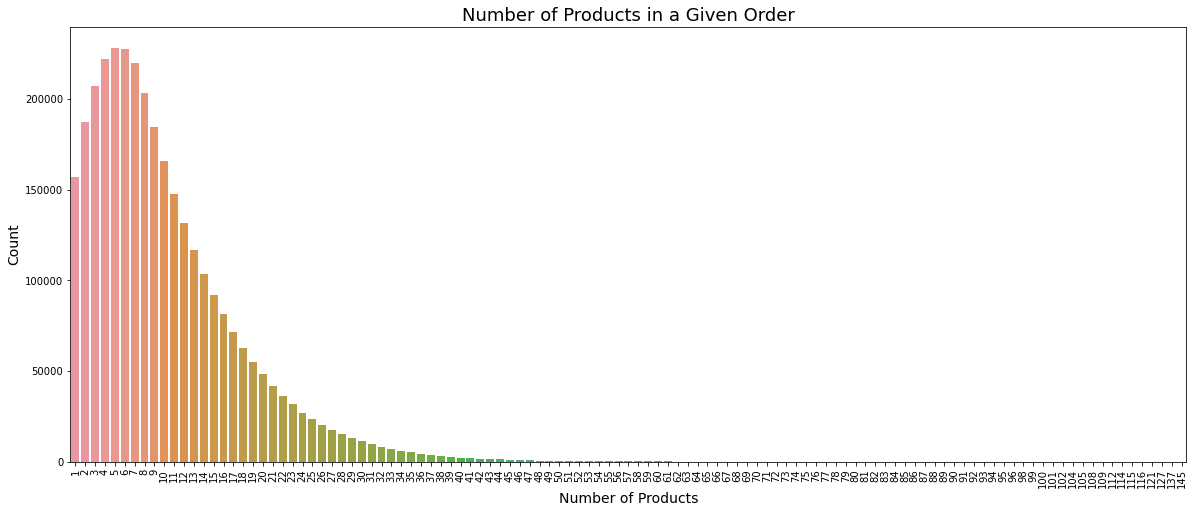

In [29]:
df = pd.DataFrame(order_products_complete.groupby('order_id')['add_to_cart_order'].aggregate('max'))
count = df['add_to_cart_order'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(count.index, count.values)
plt.xlabel('Number of Products',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Number of Products in a Given Order',fontsize=18)
plt.xticks(rotation='vertical')

This is a right-tailed distribution with the maximum of 5 or 6 products.

## Reordered products in an order

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 <a list of 98 Text major ticklabel objects>)

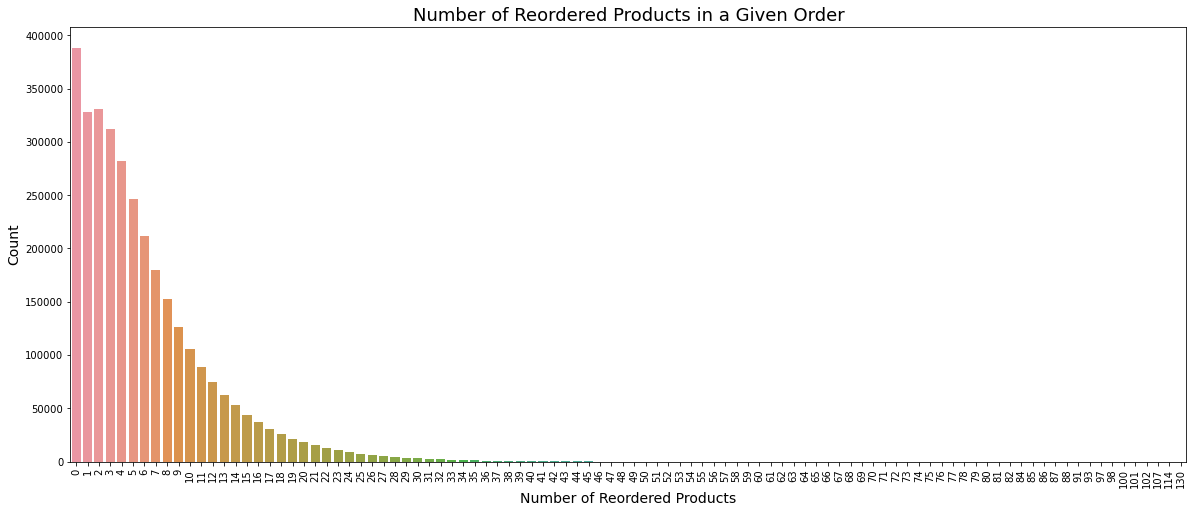

In [30]:
df = pd.DataFrame(order_products_complete.groupby('order_id')['reordered'].aggregate('sum'))
count = df['reordered'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(count.index, count.values)
plt.xlabel('Number of Reordered Products',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Number of Reordered Products in a Given Order',fontsize=18)
plt.xticks(rotation='vertical')

# USER ANALYSIS

## Number of orders by a customer

In [31]:
orders_per_cust = pd.DataFrame(order_products_complete.groupby(['user_id'])['order_number'].aggregate('max'))
orders_per_cust = orders_per_cust.sort_values(by=['order_number'],ascending=False)
orders_per_cust['order_number'].mean(),orders_per_cust['order_number'].min(), orders_per_cust['order_number'].max()

(15.590367054784224, 3, 99)

The average number of prior orders by a customer is 15.59 orders. The minimum is 3 orders and the maximum is 99 orders.

## Average days between orders for a customer

In [32]:
avg_days = pd.DataFrame(order_products_complete.groupby(['user_id'])['days_since_prior_order'].aggregate('mean'))
avg_days = avg_days.sort_values(by=['days_since_prior_order'],ascending=False)
avg_days['days_since_prior_order'].mean(), avg_days['days_since_prior_order'].min(), avg_days['days_since_prior_order'].max()

(15.469669692770546, 0.0, 30.0)

The average average number of days between orders for all customers is 15.47, with a minimum of 0 and a maximum of 30. 

## Average basket size for a customer

In [33]:
basket_size = pd.DataFrame(order_products_complete.groupby(['user_id','order_number'])['add_to_cart_order'].aggregate('max'))
basket_size.head(10)

add_to_cart_order
user_id order_number                   
1       1                             5
        2                             6
        3                             5
        4                             5
        5                             8
        6                             4
        7                             5
        8                             6
        9                             6
        10                            9

In [34]:
avg_basket_size = pd.DataFrame(basket_size.groupby(['user_id'])['add_to_cart_order'].aggregate('mean'))
avg_basket_size['add_to_cart_order'].mean(), avg_basket_size['add_to_cart_order'].min(), avg_basket_size['add_to_cart_order'].max()

(9.951586064751108, 1.0, 70.25)

The average average basket size for all customers is 9.95 items, with a minimum of 1 and a maximum of 70.25.

## Total items purchased by a customer

In [35]:
sum_basket_size = pd.DataFrame(basket_size.groupby(['user_id'])['add_to_cart_order'].aggregate('count'))
sum_basket_size['add_to_cart_order'].mean(), sum_basket_size['add_to_cart_order'].min(), sum_basket_size['add_to_cart_order'].max()

(15.590367054784224, 3, 99)

The average total items purchased by a customer is 15.59, with a minimum of 3 and a maximum of 99.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

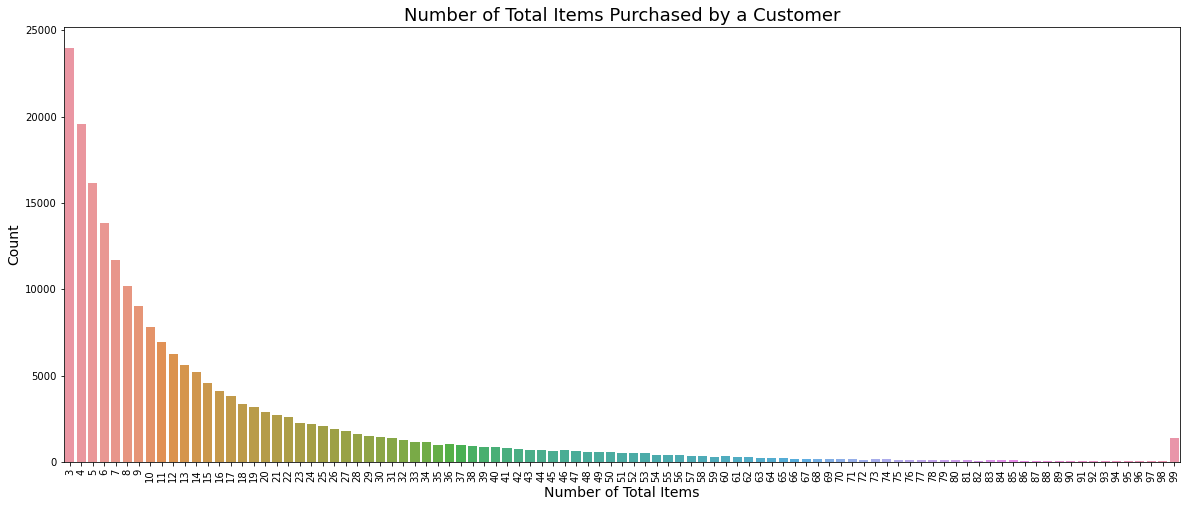

In [36]:
count = sum_basket_size['add_to_cart_order'].value_counts().nlargest(100)
plt.figure(figsize=(20,8))
sns.barplot(count.index, count.values)
plt.xlabel('Number of Total Items',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Number of Total Items Purchased by a Customer',fontsize=18)
plt.xticks(rotation='vertical')